<a href="https://colab.research.google.com/github/ENG19CS0334-TEJAAL-M/AI-ML/blob/main/Project_on_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

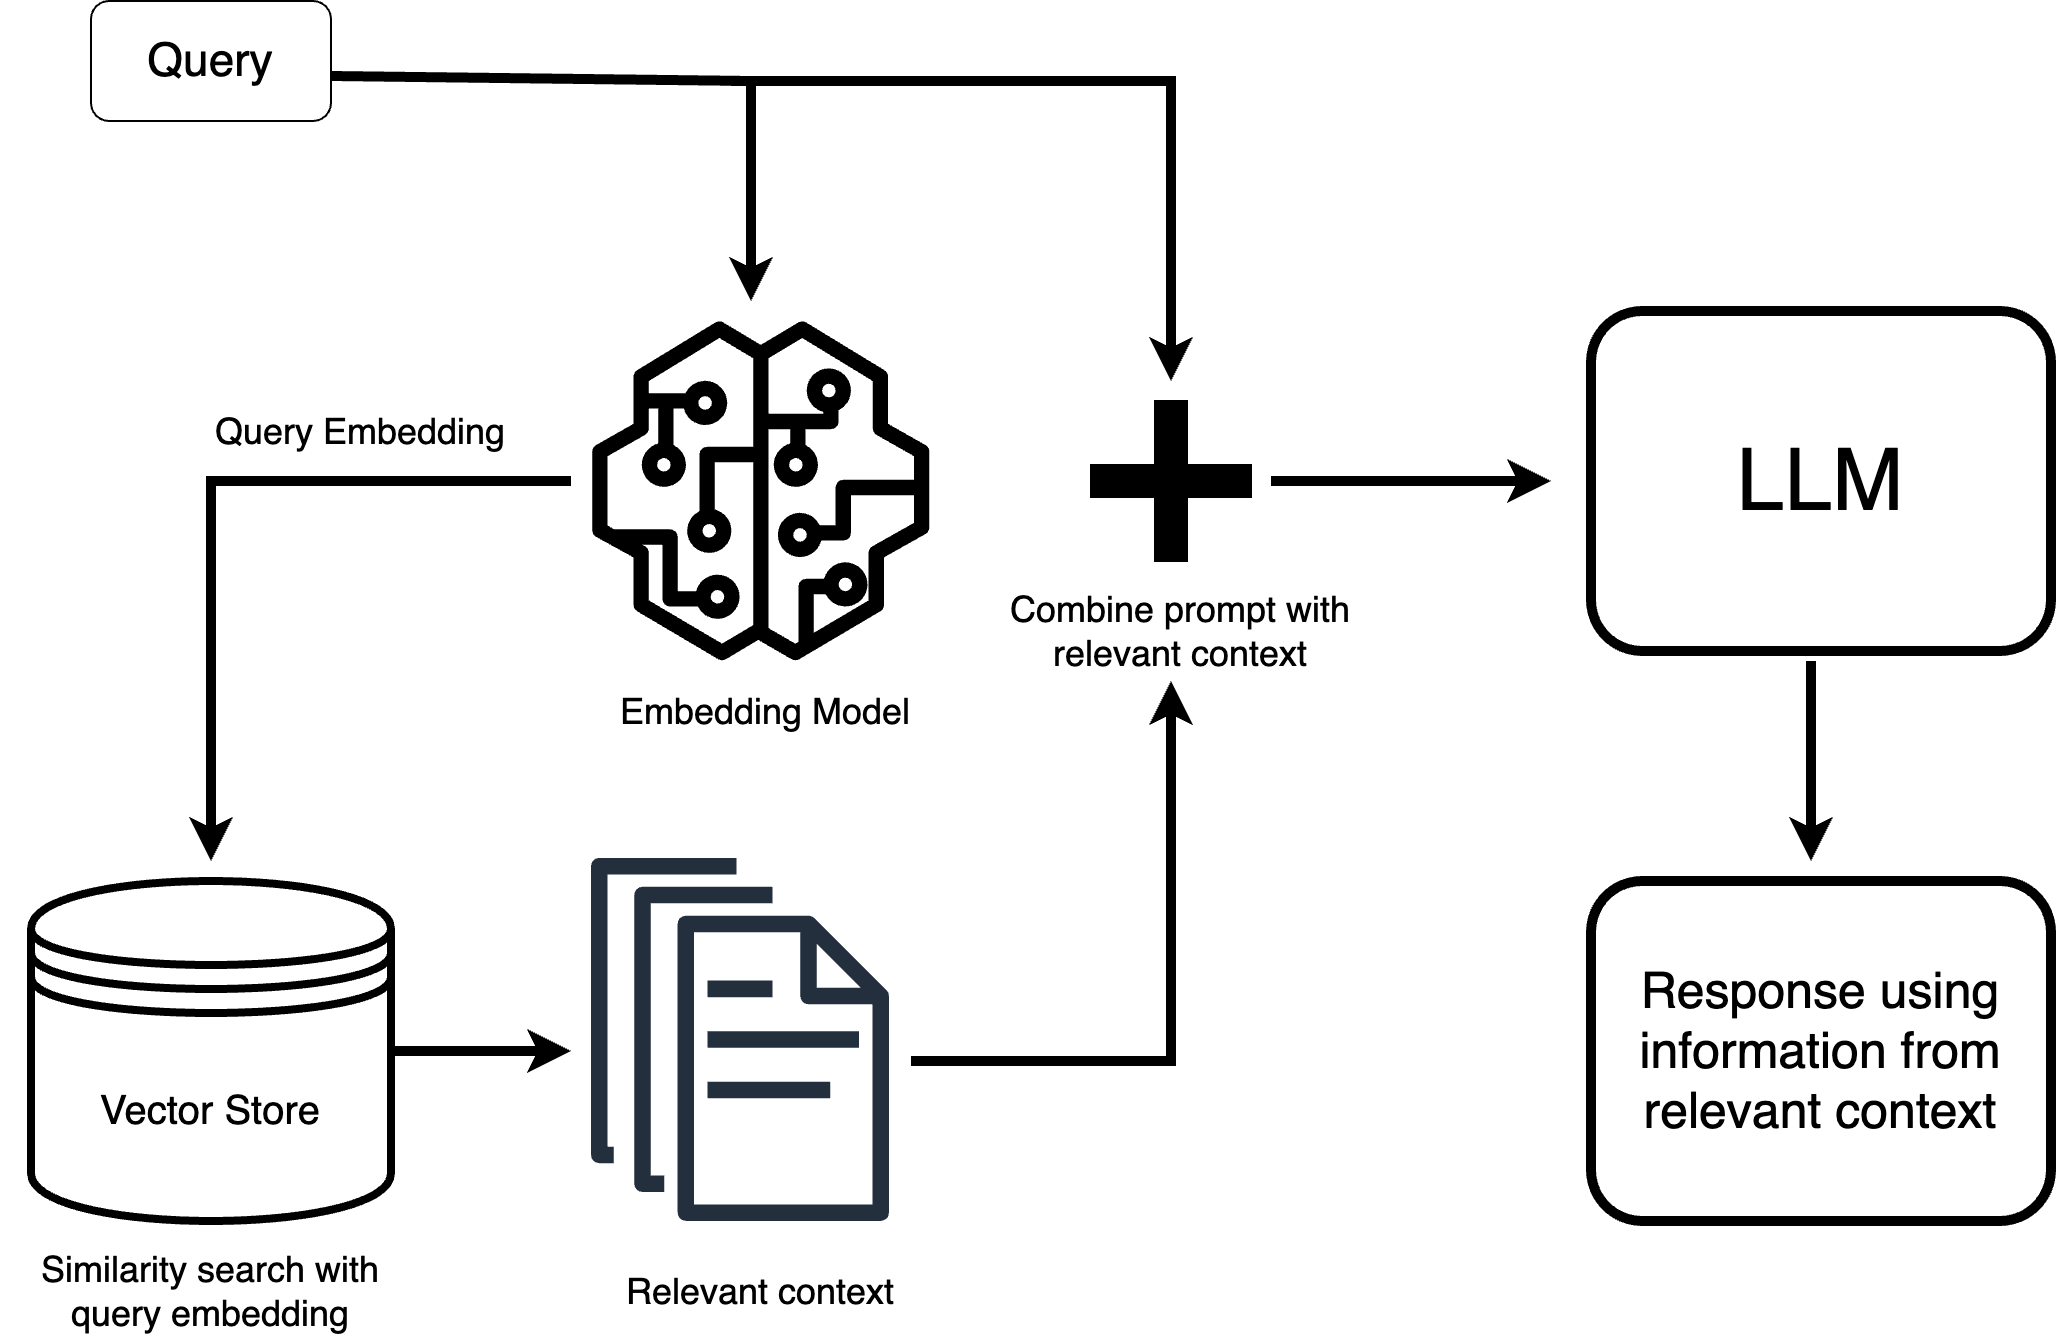

In [ ]:
!pip install langchain_community langchainhub chromadb langchain

In [ ]:
from google.colab import userdata
groq_api_key = userdata.get('GROQ_API_KEY')

In [ ]:
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader(web_paths=["https://www.geeksforgeeks.org/nlp/what-is-retrieval-augmented-generation-rag/"])

docs = loader.load()
print(docs)

[Document(metadata={'source': 'https://www.geeksforgeeks.org/nlp/what-is-retrieval-augmented-generation-rag/', 'title': 'What is Retrieval-Augmented Generation (RAG) ? - GeeksforGeeks', 'description': 'Your All-in-One Learning Portal: GeeksforGeeks is a comprehensive educational platform that empowers learners across domains-spanning computer science and programming, school education, upskilling, commerce, software tools, competitive exams, and more.', 'language': 'en-US'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nWhat is Retrieval-Augmented Generation (RAG) ? - GeeksforGeeks\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\nTutorialsPythonJavaDSAML & Data ScienceInterview CornerProgramming LanguagesWeb DevelopmentCS SubjectsDevOpsSoftware and ToolsSchool LearningPractice Coding ProblemsCoursesDSA / PlacementsML & Data Sci

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size = 1000, chunk_overlap = 200)
splits = text_splitter.split_documents(docs)

In [ ]:
print(splits[5])


page_content='Static models rely on training data that may become obsolete. RAG dynamically retrieves up-to-date information, ensuring relevance and accuracy in real-time.Contextual Relevance: Generative models often struggle with maintaining context in complex or multi-turn conversations. RAG retrieves relevant documents to enrich the context, improving coherence and relevance.Domain-Specific Knowledge: Generic models may lack expertise in specialized fields. RAG integrates domain-specific external knowledge for tailored and precise responses.Cost and Efficiency: Fine-tuning large models for specific tasks is expensive. RAG eliminates the need for retraining by dynamically retrieving relevant data, reducing costs and computational load.Scalability Across Domains: RAG is adaptable to diverse industries, from healthcare to finance, without extensive retraining, making it highly scalableChallenges and Future DirectionsDespite its advantages, RAG faces several challenges:Complexity: Combi

page_content='Retrieval-augmented generation (RAG) is an innovative approach in the field of natural language processing (NLP) that combines the strengths of retrieval-based and generation-based models to enhance the quality of generated text. Retrieval-Augmented Generation (RAG)Why is Retrieval-Augmented Generation important?In traditional LLMs, the model generates responses based solely on the data it was trained on, which may not include the most current information or specific details required for certain tasks. RAG addresses this limitation by incorporating a retrieval mechanism that allows the model to access external databases or documents in real-time. This hybrid model aims to leverage the vast amounts of information available in large-scale databases or knowledge bases making it particularly effective for tasks that require accurate and contextually relevant information.How does Retrieval-Augmented Generation work?The system first searches external sources for relevant inform

In [ ]:
print(len(splits))

21


#Store in Vector DB

In [ ]:
#i wana store in vector db
from langchain.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain.vectorstores import Chroma


vectorstore = Chroma.from_documents(documents=splits, embedding=SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2"))

/tmp/ipython-input-1812897218.py:6: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  vectorstore = Chroma.from_documents(documents=splits, embedding=SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2"))
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
print(vectorstore._collection.count())

21


In [ ]:
print(vectorstore._collection.get())

{'ids': ['1d0a4dd3-82eb-4cad-ab78-658eb8d79c4c', '6f6fa8a5-1086-4d2a-bfb3-758f65d40915', '5a394700-c637-46d9-a729-6723e028da6c', 'b8e18fbd-731c-41ff-a0af-87099c71612d', '1a15c81b-91e5-455b-8ebb-70abefcb109c', '37654e19-7438-4c60-ab73-eddc459a784c', '2cad92ed-1bcf-44f9-a71c-a1aeca65c24b', '7929567c-9ac9-4dec-8aca-211ad128411d', '3dad287f-0a1b-43af-a542-3d3f4dd34b57', '157bbe8a-b225-4c35-9466-9a96ef59f806', '7dd4eb90-de33-474b-9c33-9350ee8b23bb', '39c8a77d-ff4b-45da-bd38-2902eb8487bd', '8131d277-605e-4fe0-86c3-8dd569df9823', '001565f8-97fe-49a8-a29c-f97c607f559b', '58251545-6fb5-4748-8407-2010fd96e786', '141e5280-726b-4e15-b8b5-ef0e7a4e56ad', 'c18e1e3c-c22b-40a3-880d-9f83b6bbf953', 'acdf3c46-5895-4976-b607-5ee0ead6d0d3', '29c7c213-23ac-45da-89ef-969bb0e5aa48', '3f544853-ed55-4e3e-acfe-333bc5b5fea2', '3ba8d88f-822d-4643-a449-df44bd20a6b0'], 'embeddings': None, 'documents': ['What is Retrieval-Augmented Generation (RAG) ? - GeeksforGeeks\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\

In [ ]:
print("\nCollection 1 - ", vectorstore._collection.get(ids=['5a394700-c637-46d9-a729-6723e028da6c'], include=["embeddings", "documents"]))


Collection 1 -  {'ids': ['5a394700-c637-46d9-a729-6723e028da6c'], 'embeddings': array([[-6.10222705e-02, -4.22047190e-02, -5.32806739e-02,
         6.27830550e-02,  3.99701782e-02,  2.53312755e-02,
         3.77088971e-02,  2.70698629e-02, -3.39805670e-02,
        -5.96676543e-02, -1.91462319e-02,  4.60934546e-03,
         1.19852267e-01, -3.78410555e-02,  5.92673942e-03,
         4.32839356e-02,  1.17123112e-01,  2.15692762e-02,
        -5.87474629e-02, -6.11574762e-02,  4.27399091e-02,
         1.98741313e-02,  1.95176410e-03, -5.19364327e-02,
         8.13285541e-03,  1.00408560e-02,  2.65878029e-02,
        -3.49811241e-02,  7.49042332e-02, -1.34003991e-02,
         8.40241015e-02,  3.43582518e-02, -1.61685292e-02,
         6.21048324e-02, -8.60539451e-02,  6.53565349e-03,
        -5.41690625e-02,  9.77763981e-02, -3.60259749e-02,
        -4.99369837e-02, -2.91006304e-02,  1.75833236e-02,
        -2.56654713e-02,  1.14005003e-02,  7.96142146e-02,
         5.73165044e-02, -4.276926

#Retrieve

In [ ]:
retriever = vectorstore.as_retriever()

In [ ]:
from langchain import hub
prompt = hub.pull("rlm/rag-prompt")

/usr/local/lib/python3.12/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [ ]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

In [ ]:
!pip install langchain_groq

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.1-8b-instant")

retriever = vectorstore.as_retriever()

rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [ ]:
def format_docs(docs):
  return "\n".join(doc.page_content for doc in docs)

In [ ]:
rag_chain.invoke("What is Fine-tuning?")

'Fine-tuning is the process of adapting a Large Language Model to specific tasks or domains by training it on a small dataset of domain-specific examples. This allows the model to learn domain-specific language and behaviors, potentially improving performance. However, it requires domain-specific data and can be computationally expensive.'

In [ ]:
rag_chain.invoke("Step-by-Step Process of RAG in Action")

"The Retrieval-Augmented Generation (RAG) process in action involves two stages: Retrieval and Generation. In the Retrieval Stage, the system accesses a vast medical knowledge base and searches for relevant information related to the queried medical condition's symptoms. In the Generation Stage, the system generates a response that includes factual information about the symptoms using the retrieved knowledge."

In [ ]:
from langchain_core.runnables import RunnableLambda

In [ ]:
def print_prompt(prompt_text):
  print("Prompt - ", prompt_text)
  return prompt_text

In [ ]:
rag_chain_with_print = ({"context" : retriever | format_docs, "question" : RunnablePassthrough()}
             | prompt
             | RunnableLambda(print_prompt)
             | llm
             | StrOutputParser())

https://smith.langchain.com/hub/rlm/rag-prompt

In [ ]:
rag_chain_with_print.invoke("What problems does RAG solve?")

Prompt -  messages=[HumanMessage(content='You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don\'t know the answer, just say that you don\'t know. Use three sentences maximum and keep the answer concise.\nQuestion: What problems does RAG solve? \nContext: ongoing efforts to ensure fairness and mitigate biases.RAG Applications with ExamplesHere are some examples to illustrate the applications of RAG we discussed earlier:1. Advanced Question-Answering SystemScenario:  Imagine a customer support chatbot for an online store. A customer asks, "What is the return policy for a damaged item?"RAG in Action: The chatbot retrieves the store\'s return policy document from its knowledge base. RAG then uses this information to generate a clear and concise answer like, "If your item is damaged upon arrival, you can return it free of charge within 30 days of purchase. Please visit our returns page for detailed instructions."

'RAG solves several challenges in NLP and AI applications, including factual inaccuracies and hallucinations, outdated information, and contextual relevance. It reduces the risk of providing incorrect information by retrieving verified external data and ensures that responses are grounded in factual knowledge. RAG also dynamically retrieves up-to-date information, making it more accurate and relevant in real-time.'

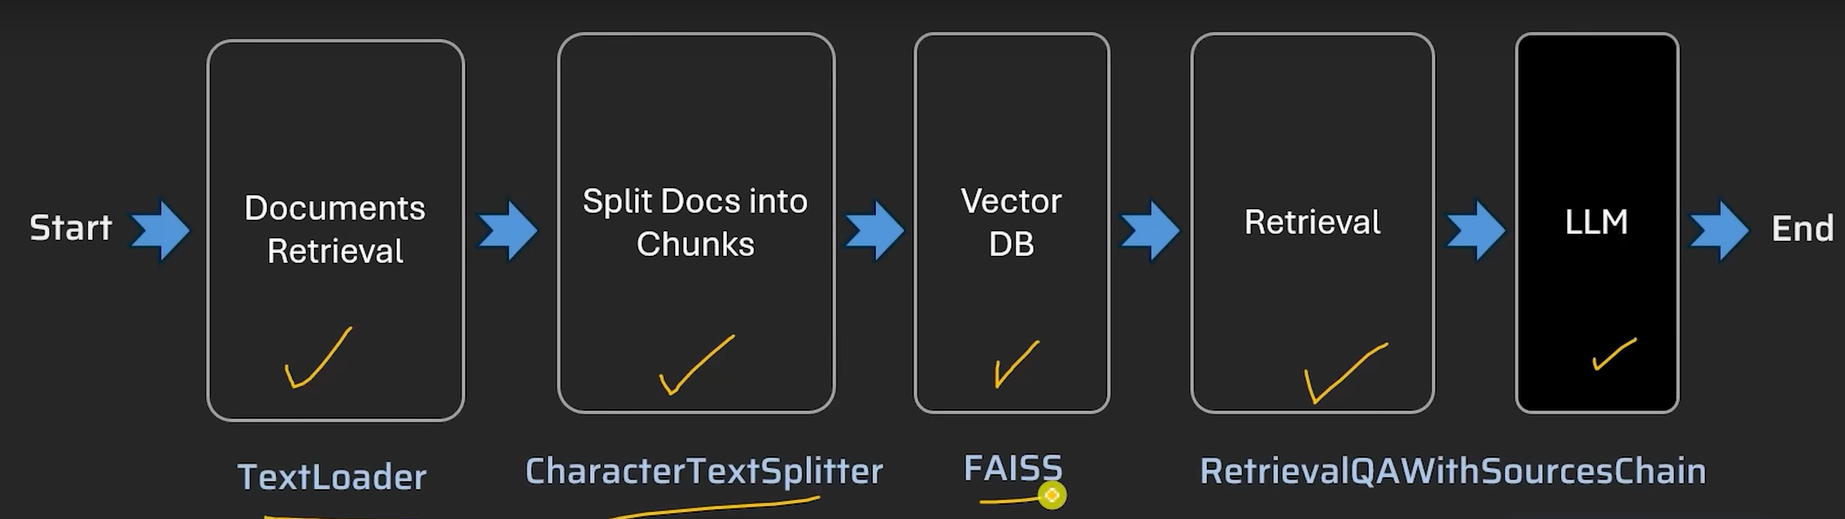

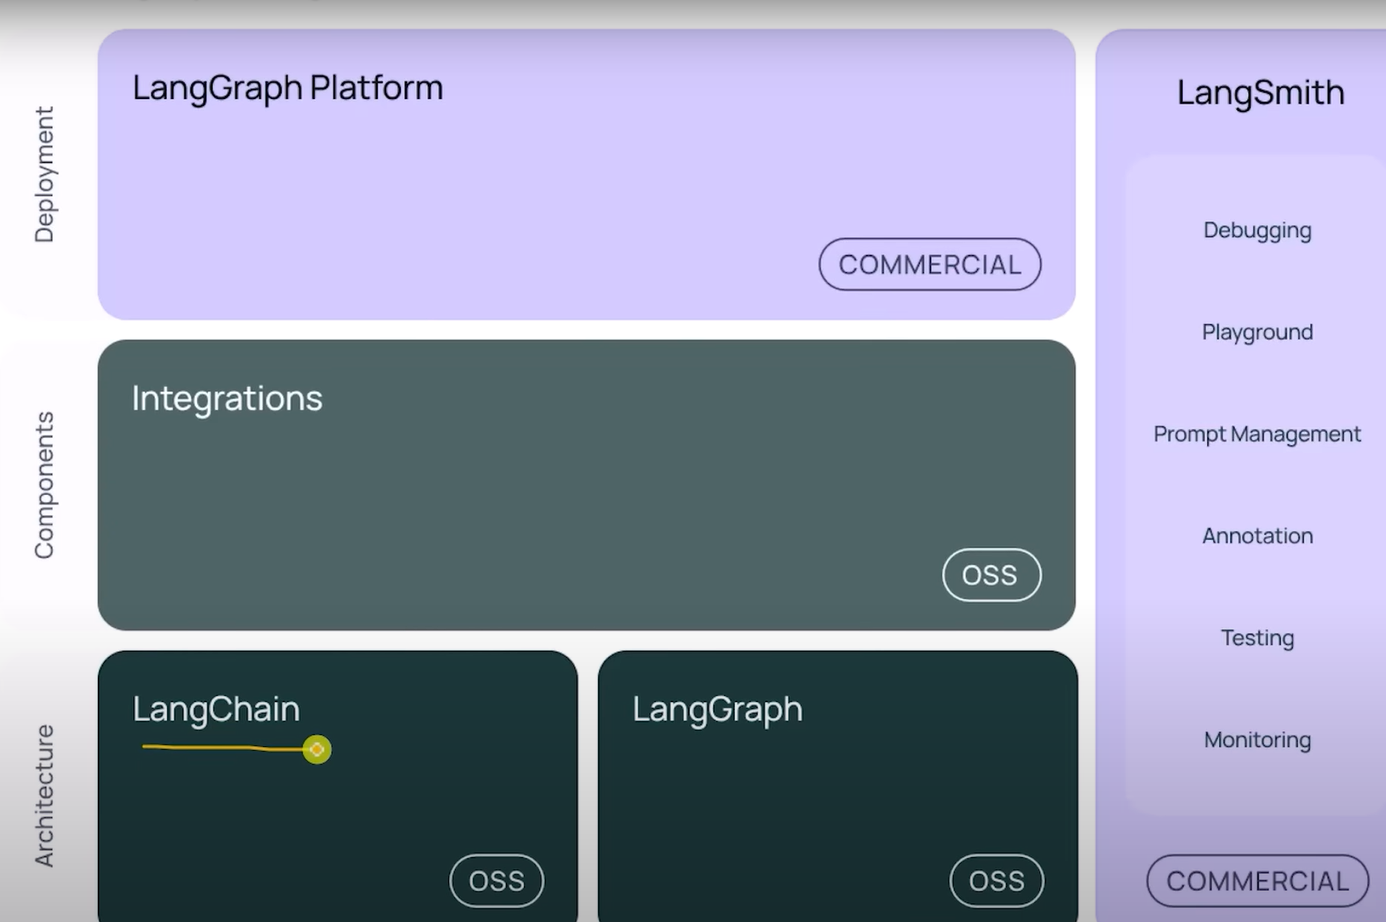

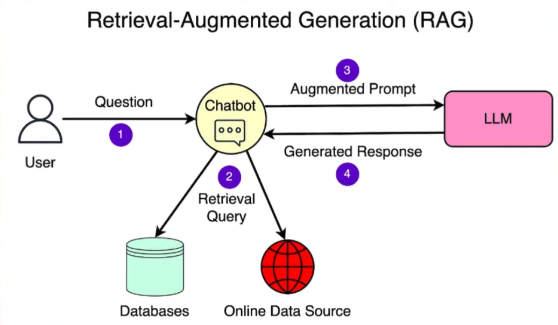